# Extract the Data
First we extract the raw gsr data from Shimmer file using openShimmerFile.

In [0]:
Raw_GSR = openShimmerFile('110_Session1_Shimmer_9301_Calibrated_PC.csv', 'Shimmer_9301_GSR_Skin_Conductance_CAL')

# Visualise the raw data
After extracting the data we visualise the raw data.

<Figure size 864x288 with 0 Axes>

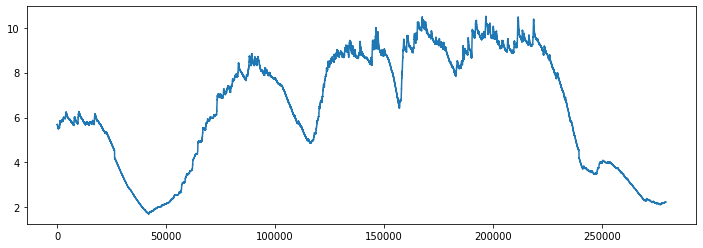

<Figure size 864x288 with 0 Axes>

In [39]:
# Visualise the data
gsrdata = np.array(Raw_GSR)
plt.figure(figsize=(12,4))
plt.plot(gsrdata)
plt.figure(figsize=(12,4))

# Process the EDA
For processing the EDA and calculating the mean, the max, and the number of peaks, we use process_segmentwise function. 

Data here is downsampled to 40Hz frequency like it is explained in preprocessing notebook. Other parts of preprocessing are handled in process function which is called inside process_segmentwise and there is no need to worry about it.

In [0]:
wd, m = process_segmentwise(data, sample_rate=sample_rate, segment_width=segment_width, segment_overlap=0)

# Working Data(wd) and Measures(m)
Process segmentwise returns two dictionaries: Working Data(wd) and  Measures(m)
<br>
<br>

Working Data(wd): This dictionary includes:
<br>
- filtered_gsr: gsr signal passed from low pass filter for each window

- rol_mean: rolling widnow passed from filtered gsr for each window

- normalized_gsr: normalized window averaged filtered gsr for each window

- filtered_phasic_gsr: filtered phasic component of normalized gsr for each window

- phasic_gsr: phasic component of gsr for each window

- tonic_gsr: tonic component of gsr for each window

- peaklist: the list of collected peaks in each window for each window

- indexlist: the index list of collected peaks for each window
<br>

Measures(m): This dictionary includes:
<br>
- number_of_peaks: number of peaks collected for each window

- mean: mean of normalized gsr for each window

- max: max of normalized gsr for each window

# Number of Collected Peaks
To see the number of collected peaks we use Measures(m) dictionary:

In [34]:
print(m['number_of_peaks'])

[4, 6, 6, 5, 1]


As you can see we have 5 different windows, and we collected 4, 6, 6, 5, and 1 peaks resectively in those windows. (Total of 22 peaks)

# Indexlist Mapping
Mapping the indexlist of each window to original data


In [0]:
#plot
for index,i in enumerate(wd['indexlist']):
  for index2,j in enumerate(i):
    wd['indexlist'][index][index2] = j+segment_width*sample_rate*index

# Storing the peaks for visualization


In [0]:
peaks = []
for index,i in enumerate(wd['indexlist']):
  for index2,j in enumerate(i):
    peaks.append(j)

# Plot
Here we plot the filtered GSR data along with detected peaks:

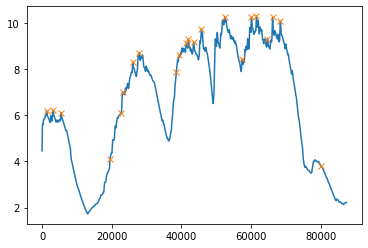

In [37]:
filtered_gsr = []
for i in wd['filtered_gsr']:
  for j in i:
    filtered_gsr.append(j)

filtered_gsr = np.array(filtered_gsr)

plt.plot(filtered_gsr)
plt.plot(peaks, filtered_gsr[peaks], "x")
plt.show()